In [1]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3
#modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant byt 
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

# Find data on the portal

 using DHS data on shelter population
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data 
 
 https://opendata.cityofnewyork.us/data/ -> Department of Homeless Services (DHS) (in data by agency)
 
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Homeless+Services+%28DHS%29
 -> DHS daily report
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m -> View Data 
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m/data -> Export
 
 this gives me various links. I copy and paste below the CSV link

# solution 1: download from the portal 


In [4]:
!curl https://data.cityofnewyork.us/api/views/k46n-sa2m/rows.csv?accessType=DOWNLOAD > dhsdaily.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k    0  140k    0     0   477k      0 --:--:-- --:--:-- --:--:--  479k


In [5]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/fb55/PUIdata


In [6]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/fb55/PUIdata


In [7]:
# move the data
!mv dhsdaily.csv $PUIDATA

In [8]:
#test if the data is there
!ls $PUIDATA

2015_station_data.csv
2015_status_data.csv
2015_trip_data.csv
2015_weather_data.csv
311_Service_Requests_from_2010_to_Present_head.csv
311_Service_Requests_from_2010_to_Present_short.csv
dhsdaily.csv
IntrotoStats_Table6_1.csv
NYPD_7_Major_Felony_Incidents.csv
README.txt
test.tmp
test.txt


## read in the data with pandas

In [9]:
#read in the data with pandas
import pandas as pd
dhs = pd.read_csv("%s/dhsdaily.csv"%os.getenv("PUIDATA"))

In [10]:
#print the fist 8 lines out
dhs.head(8)

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
0,08/21/2013,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811
1,08/22/2013,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827
2,08/23/2013,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826
3,08/24/2013,28274,21343,49617,7110,2690,9800,10291,14650,21343,35993,1801,3824
4,08/25/2013,28458,21400,49858,7230,2704,9934,10324,14694,21400,36094,1804,3830
5,08/26/2013,28485,21392,49877,7252,2704,9956,10307,14688,21392,36080,1809,3841
6,08/27/2013,28414,21322,49736,7209,2713,9922,10277,14640,21322,35962,1813,3852
7,08/28/2013,28428,21325,49753,7229,2721,9950,10284,14647,21325,35972,1803,3831


In [32]:
#print the last 3 lines out
dhs.tail(3)

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
1811,09/14/2018,37845,22243,60088,11208,4355,15563,12610,16967,22243,39210,2500,5315
1812,09/15/2018,37859,22294,60153,11199,4370,15569,12632,17009,22294,39303,2481,5281
1813,09/16/2018,37933,22347,60280,11248,4374,15622,12651,17030,22347,39377,2481,5281


In [12]:
#look at the columns available, those are the variables
dhs.columns

Index(['Date of Census', 'Total Adults in Shelter',
       'Total Children in Shelter', 'Total Individuals in Shelter',
       'Single Adult Men in Shelter', 'Single Adult Women in Shelter',
       'Total Single Adults in Shelter', 'Families with Children in Shelter',
       'Adults in Families with Children in Shelter',
       'Children in Families with Children in Shelter',
       'Total Individuals in Families with Children in Shelter ',
       'Adult Families in Shelter',
       'Individuals in Adult Families in Shelter'],
      dtype='object')

In [13]:
#count how many rows, those are the data points
dhs.size

23582

In [14]:
#select 2 columns only for plotting
dhs_2c = dhs[['Total Children in Shelter', 'Adult Families in Shelter']]

In [15]:
dhs_2c.head()

,Total Children in Shelter,Adult Families in Shelter
0,21314,1796
1,21324,1803
2,21291,1802
3,21343,1801
4,21400,1804


## plot the data

In [16]:
dhs_2c.plot(x="Total Children in Shelter", y="Adult Families in Shelter")

In [17]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


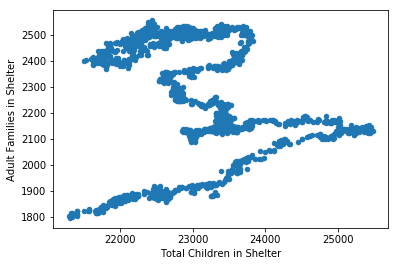

In [44]:
dhs_2c.plot(x="Total Children in Shelter", y="Adult Families in Shelter", kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: number of adult families in NYC shelters against total number of children in shelters as reported by the Department of Homeless Services between 8/21/2013 and 9/16/2018. The two variable curiously do not display a strong correlation. Also note that the number of children is about 10 times the number of adult families

In [28]:
#now select a date and 2 variables
dhs_3c = dhs[["Date of Census", 'Total Children in Shelter', 'Adult Families in Shelter']]

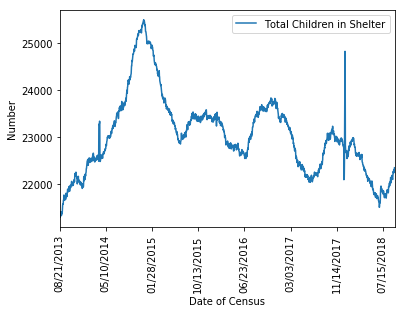

In [29]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x="Date of Census", y='Total Children in Shelter', rot=90);
ax.set_ylabel("Number");

Figure 2: number of adult children in NYC shelters as a function of time between 8/21/2013 and 9/16/2018. The number peaks in early 2015. there is no single trend, but seasonal trends can be spotted

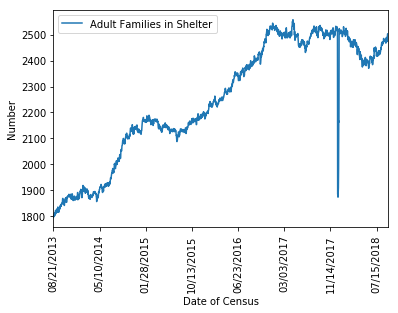

In [30]:
#plot the other columns
ax = dhs_3c.plot(x="Date of Census", y='Adult Families in Shelter', rot=90)
ax.set_ylabel("Number");

Figure 3: number of adult families NYC shelters against total number of children in shelters as reported by the Department of Homeless Services between 8/21/2013 and 9/16/2018. UNlike fo the number of adult families, there is a steady increasing trend in the children shelter population which grows from 1800 by about 30% 

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [19]:
url = "https://data.cityofnewyork.us/resource/wece-v9d7.json"

In [22]:
#use the appropriatepandas function to read in the json file
df = pd.read_json("https://data.cityofnewyork.us/resource/wece-v9d7.json")

In [24]:
# print it out
df.head(3)

,adult_families_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,date_of_census,families_with_children_in_shelter,individuals_in_adult_families_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,total_individuals_in_shelter,total_single_adults_in_shelter
0,1796,14607,21314,2013-08-21T00:00:00.000,10261,3811,7231,2710,28359,21314,35921,49673,9941
1,1803,14622,21324,2013-08-22T00:00:00.000,10274,3827,7201,2716,28366,21324,35946,49690,9917
2,1802,14611,21291,2013-08-23T00:00:00.000,10266,3826,7149,2671,28257,21291,35902,49548,9820
